In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as st
import pingouin as pg
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

Frecuencia: número de datos que caen en un grupo particular.

Análisis de datos categóricos: análisis de frecuencias.

Cuando se comparan 2 o más grupos, los datos a menudo se muestran en forma de tabla de frecuencia, también llamada tabla de contingencia.

| |Diestro|Zurdo|Total|
|---|---|---|---|
|Hombres|43|9|52|
|Mujeres|44|4|48|
|Total|87|13|100|

Si tenemos un solo factor (una tabla con una sola fila), las opciones de análisis son limitadas. 

Pruebas estadísticas para el análisis de tablas de frecuencia: 
- Prueba de chi-cuadrado
    - Es el tipo más común. 
    - Es una prueba de hipótesis, que verifica si las entradas en las celdas individuales en una tabla de frecuencia provienen todas de la misma distribución. 
    - Comprueba la hipótesis nula $H_0$ de que los resultados son independientes de la fila o columna en la que aparecen.
    - La hipótesis alternativa $H_a$ no especifica el tipo de asociación, por lo que se requiere mucha atención a los datos para interpretar correctamente la información proporcionada por la prueba. 
    - Es una prueba aproximada.

- Prueba exacta de Fisher 
    - Es una prueba exacta. 
    - Es computacionalmente más costoso y complejo.
    - Originalmente se usó solo para números de muestra pequeños. 
    - Ahora es la prueba más recomendable de utilizar. 

- Prueba de McNemar
    - Es una prueba de pares emparejados para tablas de 2×2.
    - Ej: si desea ver si 2 médicos obtienen resultados comparables al comprobar (los mismos) pacientes si son aptos para el trabajo. 
    
- Prueba Q de Cochran
    - Es una extensión de la prueba de McNemar para muestras relacionadas que proporciona un método para probar las diferencias entre 3 o más conjuntos de frecuencias o proporciones emparejados/emparejados. 
    - Ej: si tiene exactamente las mismas muestras analizadas por 3 laboratorios diferentes y desea verificar si los resultados son estadísticamente equivalentes.

# 9.1 Proporciones e Intervalos de Confianza

Si tenemos un grupo de datos de muestra, podemos verificar si la muestra es representativa de la población estándar. 

Tenemos que conocer la proporción $p$ de la característica en la población estándar. 

La ocurrencia de una característica en un grupo de $n$ personas se describe mediante la distribución binomial, con
- $media = p ∗ n$. 
- error estándar de las muestras = $se(p) = \sqrt{\frac{p(1 − p)}{n}}$
- Intervalo de confianza del 95% = $ci = mean \pm se ∗ t_{n,0.025}$

$t_{n,0.025}$ puede calcularse como la función de supervivencia inversa (ISF) de la distribución t, en el valor 0,025. 

Si los datos se encuentran fuera de este intervalo de confianza, no son representativos de la población.

## 9.1.1 Explicación

la ecuación

$se(p) = \sqrt{\frac{p(1 − p)}{n}}$

es más complicado de lo que parece: 

Si tenemos $n$ muestras independientes de una distribución binomial $B(k, p)$, la varianza de su media muestral es

$ var(\frac{1}{n} \sum\limits_{i=1}^{n} X_i) = \frac{1}{n^2} \sum\limits_{i=1}^{n} X_i var(X_i) = \frac{n~var(X_i)}{n^2} = \frac{var(X_i)}{n} = \frac{kpq}{n} $

donde $q = 1 − p$

1. $var(cX) = c^2 ~ var(X)$, para cualquier variable aleatoria, X, y cualquier constante c. 

2. La varianza de una suma de variables aleatorias independientes es igual a la suma de las varianzas. 

$ SEM = se(\bar{X}) = \sqrt{var(X_i)} = \sqrt{kpq}{n}$

- Cuando $k = n$, obtenemos 

$ se = \sqrt{pq} $

- Cuando $k = 1$, y las variables binomiales son solo ensayos de Bernoulli, 

$ se = \sqrt{\frac{pq}{n}} $ 

## 9.1.2 Ejemplo

Analicemos la incidencia y la mortalidad del cáncer de mama e intentemos

Entre los estudiantes de la Universidad de Ciencias Aplicadas de Alta Austria ("FH") 

¿Cuántos casos de cáncer de mama deberíamos esperar por año? 

¿Cuántas de las estudiantes de FH probablemente morirán de cáncer de mama al final de su vida? 

Sabemos que:

- La Universidad de Ciencias Aplicadas de Alta Austria tiene alrededor de 5000 estudiantes, de los cuales aproximadamente la mitad son mujeres.

- El cáncer de mama afecta predominantemente a las mujeres. 

- La incidencia del cáncer de mama en el grupo de edad de 20 a 30 años es de aproximadamente 10, donde la incidencia se define normalmente como las nuevas apariciones de una enfermedad por año por cada 100 000 personas.

- 3.8% de todas las mujeres mueren de cáncer. 

Parámetros para nuestros cálculos: 

- n = 2500 
- $p_{incidencia} = \frac{10}{100000} $ 
- $p_{mortalidad} = \frac{3.8}{100} $

IC del 95% para la incidencia de cáncer de mama es [-0,7, 1,2] y para el número de muertes [76, 114]. 

Esperamos que cada año, lo más probable es que ninguna o una de las estudiantes de FH sea diagnosticada con cáncer de mama, pero entre 76 y 114 de las estudiantes actuales morirán eventualmente a causa de esta enfermedad.

In [2]:
# Datos proporcionados
total_estudiantes = 5000
mujeres_estudiantes = total_estudiantes / 2
p_incidencia = 10 / 100000
p_mortalidad = 3.8 / 100

In [3]:
# Cálculo del error estándar de la media muestral para la incidencia
sem_incidencia = np.sqrt(p_incidencia * (1 - p_incidencia) / mujeres_estudiantes)
print(f'El error estándar de la media muestral para la incidencia es {sem_incidencia:.5f}.')

El error estándar de la media muestral para la incidencia es 0.00020.


In [4]:
# Cálculo del error estándar de la media muestral para la mortalidad
sem_mortalidad = np.sqrt(p_mortalidad * (1 - p_mortalidad) / mujeres_estudiantes)
print(f'El error estándar de la media muestral para la mortalidad es {sem_mortalidad:.5f}.')

El error estándar de la media muestral para la mortalidad es 0.00382.


In [8]:
alpha = 0.05

# Grados de libertad (n - 1)
df = mujeres_estudiantes - 1
df

2499.0

In [6]:
# Valor crítico t para el nivel de confianza dado y grados de libertad
t_critico = stats.t.ppf(1 - alpha/2, df)
print(f"El valor crítico t es: {t_critico:.2f}")

El valor crítico t es: 1.96


In [42]:
# Intervalo de confianza del 95% para la incidencia
ic_incidencia_inferior = p_incidencia - t_critico * sem_incidencia
ic_incidencia_superior = p_incidencia + t_critico * sem_incidencia

print(f'El IC del 95% para la incidencia es: [{ic_incidencia_inferior:.5f} , {ic_incidencia_superior:.5f}].')

El IC del 95% para la incidencia es: [-0.00029 , 0.00049].


In [43]:
# Intervalo de confianza del 95% para la mortalidad
ic_mortalidad_inferior = p_mortalidad - t_critico * sem_mortalidad
ic_moratalidad_superior = p_mortalidad + t_critico * sem_mortalidad

print(f'El IC del 95% para la mortalidad es: [{ic_mortalidad_inferior:.5f} , {ic_moratalidad_superior:.5f}].')

El IC del 95% para la mortalidad es: [0.03050 , 0.04550].


In [44]:
# Cálculo de los casos de cáncer de mama esperados por año
incidencia_esperada = mujeres_estudiantes * p_incidencia
print(f'La incidencia esperada de los casos de cáncer de mama por año es {incidencia_esperada}.')

La incidencia esperada de los casos de cáncer de mama por año es 0.25.


In [45]:
# Cálculo del número de estudiantes de FH que morirán de cáncer de mama
mortalidad_esperada = mujeres_estudiantes * p_mortalidad
print(f'La mortalidad esperada de los estudiantes es {mortalidad_esperada}.')

La mortalidad esperada de los estudiantes es 95.0.


In [9]:
# Intervalo de confianza para la incidencia
ci_incidence = stats.binom.interval(1 - alpha, n=mujeres_estudiantes, p=p_incidencia)
ci_incidence # Consultar

(0.0, 2.0)

In [10]:
# Intervalo de confianza para el número de muertes
ci_mortality = stats.binom.interval(1- alpha, n=mujeres_estudiantes, p=p_mortalidad)
ci_mortality

(77.0, 114.0)

# 9.2 Pruebas usando tablas de frecuencia

Los datos se organizan en un conjunto de categorías y se dan como frecuencias (el número total de muestras en cada categoría) (no como porcentajes)

Muchas pruebas analizan la desviación de un valor esperado.

Pruebas de chi-cuadrado: se usan dado que la distribución de chi-cuadrado caracteriza la variabilidad de los datos (su desviación de un valor medio).

$n$ es el número total de observaciones incluidas en la tabla.

Valor esperado para cada celda en una tabla de doble entrada:

||Derecho|Zurdo|Total|
|---|---|---|---|
|Hombres|45.2|6.8|52|
|Mujeres|41.8|6.2|48|
|Total|87|13|100|

$ Frecuencia~esperada = \frac{Total~de~filas * Total~de~filas}{n} $

Frecuencias absolutas observadas ($o_i$) 

Frecuencias absolutas esperadas ($e_i$). 

$H_0$: todos los datos provienen de la misma población.

Estadístico de prueba

V = $ \sum_i \frac{(o_i - e_i)^2}{e_i} \thickapprox \chi_f^2$

- sigue una distribución chi-cuadrado con f grados de libertad.
- $i$ va desde 1, ..., f , o un índice múltiple ($i_1, ..., i_n$) que va desde (1, ..., 1) a ($f_1, ..., f_n$)
- $f = \sum\limits_{i=1}^n f_i$ 

Algunos programas de análisis requieren que los datos de entrada no estén en un formato de tabla de frecuencias, sino en un formato que corresponda a los datos sin procesar originales. 

| |Diestro|Zurdo|Total|
|---|---|---|---|
|Hombres|43|9|52|
|Mujeres|44|4|48|
|Total|87|13|100|

la representamos como

|Id|Género|Mano|
|---|---|---|
|0|Hombre|Derecho|
|1|Mujer|Zurdo|
|2|Mujer|Derecho|
|3|Hombre|Derecho|
|4|Mujer|Zurdo|
|...|...|...|

Los valores categóricos pueden representarse como números enteros: 
- hombre/mujer = 0/1 
- derecha/izquierda = 0/1. 

|Id|Género|Mano|
|---|---|---|
|0|0|0|
|1|1|1|
|2|1|0|
|3|0|0|
|4|1|1|
|...|...|...|

Para más de 2 variables, se debe usar "codificación ficticia" de variables categóricas.

In [34]:
# DataFrame original
data = {
    'Género': ['Hombre', 'Mujer', 'Mujer', 'Hombre', 'Mujer'],
    'Mano': ['Derecho', 'Zurdo', 'Derecho', 'Derecho', 'Zurdo']
}

df_original = pd.DataFrame(data)
df_original

,Género,Mano
0,Hombre,Derecho
1,Mujer,Zurdo
2,Mujer,Derecho
3,Hombre,Derecho
4,Mujer,Zurdo


In [35]:
# Mapeo de género y mano a valores binarios (0 o 1)
mapeo_genero = {'Hombre': 0, 'Mujer': 1}
mapeo_mano = {'Derecho': 0, 'Zurdo': 1}

In [36]:
# Aplicar los mapeos al DataFrame original
df_original['Género'] = df_original['Género'].map(mapeo_genero)
df_original['Mano'] = df_original['Mano'].map(mapeo_mano)

In [37]:
df_original

,Género,Mano
0,0,0
1,1,1
2,1,0
3,0,0
4,1,1


## 9.2.1 Prueba de chi-cuadrado unidireccional

Suponga que va de excursión con sus amigos. 

Todas las noches sorteas quién tiene que lavar los platos. Pero al final del viaje, parece que has hecho la mayor parte del trabajo:

|Tú|Peter|Hans|Paul|Mary|Joe|
|---|---|---|---|---|---|
|10|6|5|4|5|3|

Esperas que haya habido algún juego sucio y calculas la probabilidad de que esta distribución se produzca por casualidad. La

$ Frecuencia~esperada = \frac{n_{total}}{n_{personas}} $

es 5.5. 

La probabilidad de que esta distribución resulte por casualidad es

In [46]:
data = pd.DataFrame({
    'Nombre':['Tú','Peter','Hans','Paul','Mary','Joe'],
    'Noches':[10,6,5,4,5,3]})

data

,Nombre,Noches
0,Tú,10
1,Peter,6
2,Hans,5
3,Paul,4
4,Mary,5
5,Joe,3


In [48]:
data.set_index('Nombre', inplace=True)

In [49]:
data

,Noches
Nombre,
Tú,10
Peter,6
Hans,5
Paul,4
Mary,5
Joe,3


In [61]:
n_total = data['Noches'].sum()
n_total

33

In [62]:
n_personas = len(data)
n_personas

6

In [64]:
frecuencia_esperada =   n_total / n_personas
print(f'La frecuencia esperada es: {frecuencia_esperada}.')

La frecuencia esperada es: 5.5.


In [50]:
V, p = stats.chisquare(data)
p

array([0.37313039])

In [65]:
alpha = 0.05

In [68]:
if p <= alpha:
    print(f"Con un p-value de {p}, podemos rechazar la hipótesis nula.\n")
    print("Hay evidencia suficiente para afirmar que hay una diferencia significativa en la distribución de lavado de platos entre los amigos.")
else:
    print(f"Con un p-value de {p} no podemos rechazar la hipótesis nula.\n")
    print("No hay suficiente evidencia para afirmar que haya una diferencia significativa en la distribución de lavado de platos entre los amigos.")


Con un p-value de [0.37313039] no podemos rechazar la hipótesis nula.

No hay suficiente evidencia para afirmar que haya una diferencia significativa en la distribución de lavado de platos entre los amigos.


¡Que usted haya lavado mucho los platos realmente podría haber sido por casualidad!

## 9.2.2 Prueba de contingencia chi-cuadrado

Prueba de contingencia: Cuando los datos se pueden organizar en filas y columnas, podemos verificar si los números en las columnas individuales dependen del valor de la fila. 

| |Diestro|Zurdo|Total|
|---|---|---|---|
|Hombres|43|9|52|
|Mujeres|44|4|48|
|Total|87|13|100|

Si las mujeres fueran más zurdas que los hombres, la proporción de zurdos a diestros dependería de la fila y sería mayor para las mujeres que para los hombres. 

La prueba se basa en una estadística de prueba que mide la divergencia de los datos observados de los valores que se esperarían bajo la hipótesis nula de “no asociación”.

||Derecho|Zurdo|Total|
|---|---|---|---|
|Hombres|45.2|6.8|52|
|Mujeres|41.8|6.2|48|
|Total|87|13|100|

### a) Supuestos de la prueba de contingencia Chi-Cuadrado

El estadístico de prueba V tiene una distribución aproximada de $\chi^2$, si 
- Para todas las frecuencias absolutas esperadas $e_i$: $e_i \geq 1$
- Para al menos el 80% de las frecuencias absolutas esperadas $e_i$: $e_i \geq 5$ 

Corrección de Yates: Para números de muestra pequeños, se deben hacer correcciones por algún sesgo causado por el uso de la distribución continua de chi-cuadrado, mientras que las frecuencias son números enteros.

### b) Grados de libertad

Se pueden calcular mediante el número de frecuencias absolutas observadas que se pueden elegir libremente. 

Ej: solo se debe llenar una celda de una tabla de 2×2 con las sumas al costado y en la parte inferior, y las demás se pueden encontrar mediante resta. 

En general, una tabla r×c con r filas y c columnas tiene

$ df = (r - 1)(c - 1) $ 

grados de libertad. 

La suma de las frecuencias esperadas absolutas es

$ \sum_i o_i = n $.

Es posible que tengamos que restar del número de grados de libertad, el número de parámetros que necesitamos estimar de la muestra, ya que esto implica relaciones adicionales entre las frecuencias observadas.

### c) Ejemplo 1

In [69]:
data = np.array([[43,9],
                 [44,4]])

data

array([[43,  9],
       [44,  4]])

In [70]:
# Con corrección de Yates
V, p, dof, expected = stats.chi2_contingency(data) # valor χ2, valor p, grados de libertad, valores esperados

In [74]:
print(f'Valor chi2: {V:1.3f}\n')
print(f'Valor p: {p:1.3f}\n')
print(f'Grados de libertad: {dof}\n')
print(f'Valores esperados: {expected}')

Valor chi2: 1.072

Valor p: 0.300

Grados de libertad: 1

Valores esperados: [[45.24  6.76]
 [41.76  6.24]]


In [75]:
alpha = 0.05

if p < alpha:
    print(f'Hay una diferencia entre las personas zurdas y las personas diestras entre hombres y mujeres.')
else:
    print(f'No hay una diferencia entre las personas zurdas y las personas diestras entre hombres y mujeres.')

No hay una diferencia entre las personas zurdas y las personas diestras entre hombres y mujeres.


In [76]:
# Sin corrección de Yates
V, p, dof, expected = stats.chi2_contingency(data, correction = False) 

In [77]:
print(f'Valor chi2: {V:1.3f}\n')
print(f'Valor p: {p:1.3f}\n')
print(f'Grados de libertad: {dof}\n')
print(f'Valores esperados: {expected}')

Valor chi2: 1.777

Valor p: 0.182

Grados de libertad: 1

Valores esperados: [[45.24  6.76]
 [41.76  6.24]]


In [78]:
alpha = 0.05

if p < alpha:
    print(f'Hay una diferencia entre las personas zurdas y las personas diestras entre hombres y mujeres.')
else:
    print(f'No hay una diferencia entre las personas zurdas y las personas diestras entre hombres y mujeres.')

No hay una diferencia entre las personas zurdas y las personas diestras entre hombres y mujeres.


In [ ]:
# Manualmente

$ V = \sum_i \frac{(o_i - e_i)^2}{e_i} \thickapprox \chi_f^2$

In [80]:
data

array([[43,  9],
       [44,  4]])

In [81]:
# Total de la tabla de contingencia
total_general = data.sum()
total_general

100

In [82]:
# Totales de las filas y columnas
total_filas = data.sum(axis=1)
total_columnas = data.sum(axis=0)

In [83]:
total_filas

array([52, 48])

In [84]:
total_columnas

array([87, 13])

In [85]:
# Calcular los valores esperados
frecuencia_esperada = np.outer(total_filas, total_columnas) / total_general
frecuencia_esperada

array([[45.24,  6.76],
       [41.76,  6.24]])

In [86]:
# Calcular las diferencias entre los valores observados y los valores esperados
diferencias = data - frecuencia_esperada
diferencias

array([[-2.24,  2.24],
       [ 2.24, -2.24]])

In [87]:
# Calcular el estadístico de chi-cuadrado
V = np.sum((diferencias ** 2) / frecuencia_esperada)
print("El estadístico de chi-cuadrado (V) es:", V)

El estadístico de chi-cuadrado (V) es: 1.7774150400145103


### d) Ejemplo 2

Se puede utilizar para generar una prueba de normalidad "rápida y sucia".

$H_0$: la variable aleatoria $X$ se distribuye simétricamente 

$H_1$: la variable aleatoria X no se distribuye simétricamente. 

En el caso de una distribución simétrica, la media aritmética $\bar{x}$ y la mediana deberían ser casi iguales. 

Una forma simple de probar esta hipótesis sería contar cuántas observaciones son menores que la media ($n_{-}$) y cuántas observaciones son mayores que la media aritmética ($n_{+}$). 

Si la media y la mediana son iguales, entonces el 50% de la observación debe ser menor que la media y el 50% debe ser mayor que la media. 

$ V = \frac{(n_{-} - \frac{n}{2})^2}{\frac{n}{2}} + \frac{(n_{+} - \frac{n}{2})^2}{\frac{n}{2}} \thickapprox \chi_1^2 $

In [88]:
data

array([[43,  9],
       [44,  4]])

In [89]:
# Calcular la media aritmética
media_aritmetica = np.mean(data)
print(f'La media aritmética es: {media_aritmetica} ')

La media aritmética es: 25.0 


In [90]:
# Calcular la mediana
mediana = np.median(data)
print(f'La mediana es: {mediana}.')

La mediana es: 26.0.


In [91]:
# Contar cuántas observaciones son menores que la media
n_menos = np.sum(data < media_aritmetica)
n_menos

2

In [92]:
# Contar cuántas observaciones mayores que la media
n_mas = np.sum(data > media_aritmetica)
n_mas

2

In [93]:
n_total = data.sum()
n_total

100

In [95]:
# Calcular el estadístico de chi-cuadrado (V)
V = ((n_menos - n_total/2)**2 / (n_total/2)) + ((n_mas - n_total/2)**2 / (n_total/2))
print(f'El estadístico de chi-cuadrado es: {V}.')

El estadístico de chi-cuadrado es: 92.16.


In [96]:
# Obtengo el p-value
p_value = 1 - stats.chi2.cdf(V, df=1)
p_value

0.0

In [97]:
alpha = 0.05

In [98]:
if p_value < alpha:
    print(f"Con un p-value de {p_value}, podemos rechazar la hipótesis nula.\n")
    print("Hay evidencia suficiente para afirmar que la variable no se distribuye simétricamente.")
else:
    print(f"Con un p-value de {p_value}, no podemos rechazar la hipótesis nula.\n")
    print("No hay suficiente evidencia para afirmar que la variable se distribuye simétricamente.")

Con un p-value de 0.0, podemos rechazar la hipótesis nula.

Hay evidencia suficiente para afirmar que la variable no se distribuye simétricamente.


### e) Comentarios

Es una prueba de hipótesis pura. 

Le dice si la frecuencia observada puede deberse a una selección de muestra aleatoria de una sola población. 

## 9.2.3 Prueba exacta de Fisher

Se usa cuando no se cumple el requisito de que el 80% de las celdas deben tener valores esperados de al menos 5.

Se basa en los totales de fila y columna observados. 

Consiste en evaluar la probabilidad asociada con todas las tablas 2×2 posibles que tienen los mismos totales de fila y columna que los datos observados, asumiendo que la hipótesis nula (que las variables de fila y columna no están relacionadas) es verdadera. 

Es preferible a la prueba de chi-cuadrado. 

Debe usarlo hasta 10-15 celdas en las tablas de frecuencia.

Se llama "exacta" porque la importancia de la desviación de una hipótesis nula se puede calcular con exactitud, en lugar de depender de una aproximación que se vuelve exacta en el límite a medida que el tamaño de la muestra crece hasta el infinito, como ocurre con muchas pruebas estadísticas. 

Debe decidir si desea usar una prueba de
- 1 cola
    - Busca la probabilidad de encontrar una distribución tan extrema o más extrema que la observada.
- 2 colas 
    - Considera las tablas como extremas en la dirección opuesta. 
    
Nota: El comando python stats.fisher_exact devuelve por defecto el valor p para encontrar un valor tan extremo o más extremo que el observado. Según Altman (1999), este es un enfoque razonable, aunque no todos los estadísticos están de acuerdo en ese punto.

In [125]:
data = pd.DataFrame({
    'Género': ['Hombre', 'Mujer', 'Hombre', 'Mujer', 'Hombre', 'Mujer'],
    'Resultado': ['Fracaso', 'Éxito', 'Éxito', 'Éxito', 'Éxito', 'Fracaso']
})

data

,Género,Resultado
0,Hombre,Fracaso
1,Mujer,Éxito
2,Hombre,Éxito
3,Mujer,Éxito
4,Hombre,Éxito
5,Mujer,Fracaso


In [126]:
# Crear la tabla de contingencia 2x2
contingency_table = pd.crosstab(data['Género'], data['Resultado'])
contingency_table

Resultado,Fracaso,Éxito
Género,,
Hombre,1,2
Mujer,1,2


In [127]:
# Realizar el test de Fisher
odds_ratio, p_value = stats.fisher_exact(contingency_table)

In [128]:
odds_ratio

1.0

In [129]:
p_value

1.0

In [130]:
alpha = 0.05

if p_value < alpha:
    print("Con un p-value de", p_value, "podemos rechazar la hipótesis nula.\n")
    print("Hay evidencia suficiente para afirmar que existe una asociación significativa entre el género y el resultado del experimento.")
else:
    print("Con un p-value de", p_value, "no podemos rechazar la hipótesis nula.\n")
    print("No hay suficiente evidencia para afirmar que existe una asociación significativa entre el género y el resultado del experimento.")

Con un p-value de 1.0 no podemos rechazar la hipótesis nula.

No hay suficiente evidencia para afirmar que existe una asociación significativa entre el género y el resultado del experimento.


Ej: “Una dama probando té” 

Una dama inglesa de que podía decir si la leche se vertía antes del té o no. 

Ya, poco tiempo después de su llegada a Rothamstead, su presencia había transformado una hora del té común y corriente en un acontecimiento histórico. Sucedió una tarde cuando sacó una taza de té de la urna y se la ofreció a la señora que estaba a su lado, la Dra. B. Muriel Bristol, algóloga. Ella lo rechazó, afirmando que prefería una taza en la que se hubiera vertido primero la leche. "Tonterías", respondió Fisher, sonriendo, "Seguramente no hace ninguna diferencia". Pero ella sostuvo, con énfasis, que por supuesto que sí. Justo detrás, una voz sugirió: "Vamos a probarla". Fue William Roach quien no tardó mucho en casarse con la señorita Bristol. Inmediatamente, se embarcaron en los preliminares del experimento, Roach ayudó con las tazas y se regocijó de que la señorita Bristol adivinó correctamente más que suficientes de esas tazas en las que se había vertido té primero para probar su caso.

El triunfo personal de la señorita Bristol nunca quedó registrado, y quizás Fisher no quedó satisfecho en ese momento con el improvisado procedimiento experimental. Uno puede estar seguro, sin embargo, de que incluso cuando concibió y llevó a cabo el experimento junto a la mesa de caballetes, y los espectadores, sin duda, tomaron partido en cuanto a su resultado, estaba pensando en las preguntas que planteaba. 

El verdadero significado científico de este experimento está en estas preguntas.

- ¿Qué se debe hacer con las variaciones fortuitas de temperatura, dulzura, etc.? 
    - Idealmente, a uno le gustaría que todas las tazas de té fueran idénticas excepto por el orden de verter la leche primero o el té primero.
    - Pero nunca es posible controlar todas las formas en que las tazas de té pueden diferir entre sí.
    - Si no podemos controlar estas variaciones, entonces lo mejor que podemos hacer (nos referimos a lo "mejor") es mediante la aleatorización. 

- ¿Cuántas tazas se deben usar en la prueba? ¿Deberían estar emparejados? ¿En qué orden se deben presentar las copas? 
    - El número y el orden de las tazas deberían permitirle al sujeto una amplia oportunidad de probar sus habilidades y evitar que un fraude logre discriminar correctamente el orden de servir todas las tazas de té servidas. 

- ¿Qué conclusión se podría sacar de una puntuación perfecta o de una con uno o más errores?
    - Si la dama no puede discriminar entre los diferentes órdenes de vertido, entonces, solo con adivinar, debería ser muy poco probable que esa persona determine correctamente qué tazas son cuáles para todas las tazas probadas. 
    - Si ella realmente posee alguna habilidad para diferenciar entre los órdenes de vertido, entonces puede ser irrazonable exigirle que no cometa errores para distinguir su habilidad de un adivino puro.

Escenario

- Para cada taza, registramos el orden de vertido real y cuál es el orden que dice la señora. 

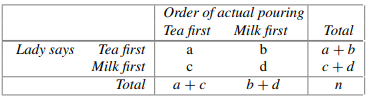

In [132]:
Image(filename = 'Imagenes/tablafisher.png')

$n$: número total de tazas de té preparadas. 

$ a + c $: número de tazas donde se sirve el té primero 

$ a + b $: la señora clasifica como té primero. 

Si 
- Puede notar la diferencia
    - b y c deberían ser pequeños. 
- No puede notar la diferencia
    - a y c deberían ser más o menos iguales. 

- Suponga ahora que
    - Para probar las habilidades de la dama, se preparan 8 tazas de té, 4 de té primero, 4 de leche primero, y se le informa del diseño (que hay 4 tazas de leche primero y 4 tazas de té primero). 
    - Los vasos se le presentan en orden aleatorio. 

Debemos identificar las 4 tazas de leche primero y las 4 tazas de té primero. 

Este diseño fija los totales de fila y columna en la tabla anterior para que sean 4 cada uno. 

$a + b = a + c = c + d = b + d = 4$

Con estas restricciones, cuando se especifica cualquiera de a, b, c, d, los 3 restantes se determinan de forma única:

$b = 4 − a$, $c = 4 − a$, y $d = a$.

Para este diseño, no importa cuántas tazas (n) se sirvan, el total de la fila $a + b$ será igual a $a + c$ porque el sujeto sabe cuántas de las tazas son de “té primero” (o de un tipo como se supone al otro). Entonces, una vez que se da $a$, se especifican los otros tres recuentos. 

- Podemos probar la habilidad discriminatoria de la dama, si la hay, aleatorizando el orden de las tazas servidas. 

Si tomamos la posición de que ella no tiene habilidad para discriminar, entonces la aleatorización del orden hace que las 4 tazas elegidas por ella como té primero tengan la misma probabilidad de ser 4 de las 8 tazas servidas. 

Hay $\binom{8}{4} = 70$ 

formas posibles de clasificar 4 de las 8 tazas como "primero el té".

In [140]:
from scipy.special import comb
comb(8, 4, exact=True)

70

Si el sujeto no tiene la capacidad de discriminar entre 2 preparaciones, entonces, mediante la aleatorización, cada una de estas 70 formas es igualmente probable. 

Solo una de las 70 formas conduce a una clasificación completamente correcta. 

Alguien sin habilidad para discriminar tiene 1/70 de posibilidades de no cometer errores.

- Si asumimos que no tiene habilidad para discriminar, el número de clasificaciones correctas de té primero ("a") tiene una distribución de probabilidad "hipergeométrica"

In [142]:
hd = stats.hypergeom(8, 4, 4)
hd

Hay 5 posibilidades para "a": 0, 1, 2, 3, 4, y las probabilidades correspondientes.

In [143]:
correctas = list(range(5))
correctas

[0, 1, 2, 3, 4]

- Podemos calcular el valor p para la prueba de la hipótesis de que la dama no puede diferenciar entre las dos preparaciones. 

El valor p es la probabilidad de observar un resultado tan extremo o más extremo que el resultado observado asumiendo la hipótesis nula. 

In [148]:
hd.pmf(correctas)

array([0.01428571, 0.22857143, 0.51428571, 0.22857143, 0.01428571])

In [146]:
for correcta in correctas:
    print(f'La probabilidad de tener {correcta} respuestas correctas es {hd.pmf(correcta):.3f}.')

La probabilidad de tener 0 respuestas correctas es 0.014.
La probabilidad de tener 1 respuestas correctas es 0.229.
La probabilidad de tener 2 respuestas correctas es 0.514.
La probabilidad de tener 3 respuestas correctas es 0.229.
La probabilidad de tener 4 respuestas correctas es 0.014.


In [149]:
hd.pmf(correctas).sum()

0.9999999999999999

Se conoce como “prueba exacta de Fisher”.

odds_ratio, p = stats.fisher_exact(obs, lternative=’greater’)

donde obs es la matriz que contiene las observaciones.

In [151]:
# Creamos la matriz de observaciones
obs = np.array([[2, 2], [3, 1]])
obs

array([[2, 2],
       [3, 1]])

In [152]:
# Realizamos la prueba exacta de Fisher con el argumento 'alternative' en 'greater'
odds_ratio, p_value = stats.fisher_exact(obs, alternative='greater')

In [153]:
odds_ratio

0.3333333333333333

In [154]:
p_value

0.9285714285714286

In [155]:
alpha = 0.05

In [157]:
if p_value < alpha:
    print(f"Con un p-value de {p_value:.3f} podemos rechazar la hipótesis nula.\n")
    print("Hay evidencia suficiente para afirmar que la dama tiene habilidad para discriminar entre el té que primero le pone la leche y el que primero pone el té .")
else:
    print(f"Con un p-value de {p_value:.3f} no podemos rechazar la hipótesis nula.\n")
    print("No hay suficiente evidencia para afirmar que la dama tiene habilidad para discriminar entre té que primero le pone la leche y el que primero pone el té .")

Con un p-value de 0.929 no podemos rechazar la hipótesis nula.

No hay suficiente evidencia para afirmar que la dama tiene habilidad para discriminar entre té que primero le pone la leche y el que primero pone el té .


## 9.2.4 Prueba de McNemar

Es una prueba estadística utilizada en datos nominales emparejados. 

Se aplica a tablas de contingencia 2×2 con rasgo dicotómico (“0/1”), con pares de sujetos emparejados. 

Tiene un parecido superficial con una prueba de asociación categórica, como podría realizarse con una prueba de chi-cuadrado de 2×2 o una prueba de probabilidad exacta de Fisher de 2 × 2.

Haciendo algo bastante diferente, 
- Prueba de asociación: examina la relación que existe entre las celdas de la tabla. 
- Prueba de McNemar: examina la diferencia entre las proporciones que se derivan de las sumas marginales de la tabla.

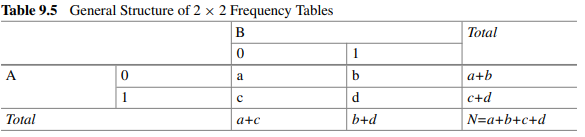

In [159]:
Image(filename = 'Imagenes/T9.5.png')

$ p_A = \frac{(a + b)}{N} $

$ p_B = \frac{(a + c)}{N} $

¿Difieren significativamente estas 2 proporciones, $p_A$ y $p_B$? 

La respuesta que reciba debe tener en cuenta que las dos proporciones no son independientes. 

La correlación de $p_A$ y $p_B$ es ocasionada por el hecho de que ambos incluyen la cantidad en la celda superior izquierda de la tabla.

Ej:
- En estudios en los que los pacientes sirven como su propio control
- En estudios con diseño de “antes y después”. 

A diferencia de la prueba de chi-cuadrado, los mismos temas/partes se categorizan en las filas y columnas.

Ejemplo

Un investigador intenta determinar si un fármaco tiene un efecto sobre una enfermedad en particular. 

Los recuentos de individuos se dan en tabla, con el diagnóstico (enfermedad: presente o ausente) antes del tratamiento en las filas y el diagnóstico después del tratamiento en las columnas. 

La prueba requiere que se incluyan los mismos sujetos en las mediciones de antes y después (pares emparejados).

| |Después:presente|Después:ausente|Total|
|---|---|---|---|
|Antes:presente|101|121|222|
|Antes:ausente|59|33|92|
|Total|160|154|314|


La hipótesis nula de “homogeneidad marginal” significaría que no hubo efecto del tratamiento. 

Estadístico de prueba de McNemar con la corrección de continuidad de Yates 

$ \chi^2 = \frac{(|b - c| - Factor~de~correcion)^2}{b + c} $

$ \chi^2 $ tiene una distribución chi-cuadrado con 1 grado de libertad. 

Para números de muestra pequeños, el factor de corrección debe ser 
- 0.5: corrección de Yates
- 1: corrección de Edward. 

Para b + c < 25, se debe realizar el cálculo binomial ya que el resultado es una prueba exacta en todos los casos. 

Usando la corrección de Yates, obtenemos

$ \chi^2 = \frac{(|121 - 59| - 0.5)^2}{121 + 59} $


= 21.01

Es extremadamente improbable a partir de la distribución implícita en la hipótesis nula ($p_b = p_c$). 

La prueba proporciona una fuerte evidencia para rechazar la hipótesis nula de ningún efecto del tratamiento.

In [161]:
a = 101
b = 121
c = 59
d = 33

In [162]:
obs = [[a,b], [c, d]]
obs

[[101, 121], [59, 33]]

In [166]:
from statsmodels.stats.contingency_tables import mcnemar
result = mcnemar(obs)
result

<bunch containing results, print to see contents>

In [167]:
# Obtener el estadístico de prueba y el valor p
chi2_statistic = result.statistic
p_value = result.pvalue

In [168]:
chi2_statistic

59.0

In [169]:
p_value

4.4344492637551645e-06

In [170]:
alpha = 0.05

In [174]:
if p_value < alpha:
    print(f"Con un p-value de {p_value:.6f} podemos rechazar la hipótesis nula.\n")
    print("Hay evidencia suficiente para afirmar que el fármaco tiene un efecto sobre la enfermedad en particular.")
else:
    print(f"Con un p-value de {p_value:.6f} no podemos rechazar la hipótesis nula.\n")
    print("No hay suficiente evidencia para afirmar que el fármaco tiene un efecto sobre la enfermedad en particular.")

Con un p-value de 0.000004 podemos rechazar la hipótesis nula.

Hay evidencia suficiente para afirmar que el fármaco tiene un efecto sobre la enfermedad en particular.


## 9.2.5 Prueba Q de Cochran

Es una extensión de la prueba de McNemar. 

Proporciona un método para probar las diferencias entre tres o más conjuntos de frecuencias coincidentes. Usaría esta prueba, por ejemplo, si tiene exactamente las mismas muestras analizadas por tres laboratorios diferentes y desea verificar si los resultados son estadísticamente equivalentes. Al igual que la prueba de McNemar, la prueba Q de Cochran es una prueba de hipótesis en la que la variable de respuesta puede tomar solo dos resultados posibles (codificados como 0 y 1). Es una prueba estadística no paramétrica para verificar si k tratamientos tienen efectos idénticos. La prueba Q de Cochran no debe confundirse con la prueba C de Cochran, que es una prueba de valores atípicos de varianza. 

Ejemplo 

Se pide a 12 sujetos que realicen 3 tareas. El resultado de cada tarea es el éxito o el fracaso. Los resultados se codifican 0 para fracaso y 1 para éxito. En el ejemplo, el sujeto 1 tuvo éxito en la tarea 2, pero falló en las tareas 1 y 3.

|Sujeto|Tarea 1|Tarea 2|Tarea 3|
|---|---|---|---|
|0|0|1|0|
|1|1|1|0|
|2|1|1|1|
|3|0|0|0|
|4|1|0|0|
|5|0|1|1|
|6|0|0|0|
|7|1|1|0|
|8|0|1|0|
|9|0|1|0|
|10|0|1|0|
|11|0|1|0|


La hipótesis nula es que no existen diferencias entre las variables. 

Si la probabilidad calculada $p$ está por debajo del nivel de significancia seleccionado, se rechaza la hipótesis nula y se puede concluir que las proporciones en al menos 2 de las variables son significativamente diferentes entre sí. 

Q de Cochran = 8,6667

p = 0.013.

Al menos una de las 3 tareas es más fácil o más difícil que las demás. 

In [19]:
obs = pd.DataFrame({
    'Sujeto': np.arange(12),
    'Tarea 1': [0,1,1,0,1,0,0,1,0,0,0,0],
    'Tarea 2': [1,1,1,0,0,1,0,1,1,1,1,1],
    'Tarea 3': [0,0,1,0,0,1,0,0,0,0,0,0]
})

obs

,Sujeto,Tarea 1,Tarea 2,Tarea 3
0,0,0,1,0
1,1,1,1,0
2,2,1,1,1
3,3,0,0,0
4,4,1,0,0
5,5,0,1,1
6,6,0,0,0
7,7,1,1,0
8,8,0,1,0
9,9,0,1,0


In [20]:
obs.set_index('Sujeto',inplace = True)

In [21]:
obs

,Tarea 1,Tarea 2,Tarea 3
Sujeto,,,
0,0,1,0
1,1,1,0
2,1,1,1
3,0,0,0
4,1,0,0
5,0,1,1
6,0,0,0
7,1,1,0
8,0,1,0


In [22]:
from statsmodels.stats.contingency_tables import cochrans_q
result = cochrans_q(obs)
result

<bunch containing results, print to see contents>

In [23]:
q_stat = result.statistic
q_stat

8.666666666666666

In [24]:
p = result.pvalue
p

0.013123728736940971

In [25]:
alpha = 0.05

In [26]:
if p < alpha:
    print('Al menos una de las 3 tareas es más fácil o más difícil que las demás.')
else:
    print('No existen diferencias entre la dificultad de las tareas.')

Al menos una de las 3 tareas es más fácil o más difícil que las demás.


In [27]:
# Datos
tareas = np.array([[0,1,1,0,1,0,0,1,0,0,0,0],
                   [1,1,1,0,0,1,0,1,1,1,1,1],
                   [0,0,1,0,0,1,0,0,0,0,0,0]])
tareas

array([[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [28]:
out = np.nan * np.ones((1, 3))  # Valor ficticio para matriz de salida de iniciación

In [29]:
subjects = np.arange(tareas.shape[1])

categories = np.arange(tareas.shape[0])

In [30]:
for i in categories:
    new = np.column_stack((subjects, i*np.ones(len(subjects)), tareas[i,:]))
    out = np.vstack((out, new))

In [31]:
out

array([[nan, nan, nan],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 2.,  0.,  1.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  1.],
       [ 5.,  0.,  0.],
       [ 6.,  0.,  0.],
       [ 7.,  0.,  1.],
       [ 8.,  0.,  0.],
       [ 9.,  0.,  0.],
       [10.,  0.,  0.],
       [11.,  0.,  0.],
       [ 0.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 2.,  1.,  1.],
       [ 3.,  1.,  0.],
       [ 4.,  1.,  0.],
       [ 5.,  1.,  1.],
       [ 6.,  1.,  0.],
       [ 7.,  1.,  1.],
       [ 8.,  1.,  1.],
       [ 9.,  1.,  1.],
       [10.,  1.,  1.],
       [11.,  1.,  1.],
       [ 0.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 2.,  2.,  1.],
       [ 3.,  2.,  0.],
       [ 4.,  2.,  0.],
       [ 5.,  2.,  1.],
       [ 6.,  2.,  0.],
       [ 7.,  2.,  0.],
       [ 8.,  2.,  0.],
       [ 9.,  2.,  0.],
       [10.,  2.,  0.],
       [11.,  2.,  0.]])

In [32]:
out = out[1:,:] # Eliminar la fila de inicio ficticia

In [35]:
df = pd.DataFrame(out, columns=['Sujetos', 'Categorias', 'Valores'])

df

,Sujetos,Categorias,Valores
0,0.0,0.0,0.0
1,1.0,0.0,1.0
2,2.0,0.0,1.0
3,3.0,0.0,0.0
4,4.0,0.0,1.0
5,5.0,0.0,0.0
6,6.0,0.0,0.0
7,7.0,0.0,1.0
8,8.0,0.0,0.0
9,9.0,0.0,0.0


In [36]:
# Con pingouin

pg_out = pg.cochran(df, dv='Valores', within='Categorias', subject='Sujetos')

pg_out

,Source,dof,Q,p-unc
cochran,Categorias,2,8.666667,0.013124


In [37]:
print(f'Q = {sm_results.statistic:5.3f}, p = {sm_results.pvalue:5.3f}')

Q = 8.667, p = 0.013


In [38]:
if sm_results.pvalue < 0.05:
    print("Hay una diferencia significativa entre las tres tareas.")
else:
    print("No hay una diferencia significativa entre las tres tareas.")

Hay una diferencia significativa entre las tres tareas.


Calcular los intervalos de confianza de la población, en base a una muestra de datos dada. 

Los datos están tomados de Altman, capítulo 10.2.1. 

Suponga que un médico general elige una muestra aleatoria de 215 mujeres del registro de pacientes para su práctica general y descubre que 39 de ellas tienen antecedentes de sufrir asma. 

¿Cuál es el intervalo de confianza para la prevalencia del asma? 

In [39]:
# Datos

numTotal = 215

numPositive = 39

In [40]:
p = float(numPositive)/numTotal

se = np.sqrt(p*(1-p)/numTotal)

td = stats.t(numTotal-1)

In [43]:
# Calculo los IC

ci = p + np.array([-1,1])*td.isf(0.025)*se

print(f'IC de la muestra: [{ci[0]:5.3f} , {ci[1]:5.3f}]')

IC de la muestra: [0.130 , 0.233]


Aplicación de una prueba de chi cuadrado a una tabla de 2x2. 

Los cálculos se realizan con y sin la corrección de continuidad de Yate. 

Los datos se tomaron de Altman, Tabla 10.10: 

Comparación del número de horas de natación de nadadores con o sin erosión del esmalte dental. >= 6h: 32 sí, 118 no < 6h: 17 sí, 127 no.

In [44]:
# Datos

obs = np.array([[32, 118],
                [17, 127]])

In [45]:
# Test chi-cuadrado con statsmodels

chi2_corrected = stats.chi2_contingency(obs, correction=True)

chi2_uncorrected = stats.chi2_contingency(obs, correction=False)

In [47]:
print(f'El valor de chi2 corregido es {chi2_corrected[0]:5.3f}, con p={chi2_corrected[1]:5.3f}\n')

print(f'El valor de chi2 no corregido es {chi2_uncorrected[0]:5.3f}, con p={chi2_uncorrected[1]:5.3f}')

El valor de chi2 corregido es 4.141, con p=0.042

El valor de chi2 no corregido es 4.802, con p=0.028


In [49]:
if len(obs.shape) == 1:
    events = np.array([])

    for i, value in enumerate(obs):
        events = np.hstack((events, i*np.ones(value)))

else:
    events = np.nan * np.ones((1,2)) # necesita una matriz de inicio ficticia de 2 columnas

    obs = np.atleast_2d(obs)
    for i in range(obs.shape[0]):
        for j in range(obs.shape[1]):
            new = np.repeat([[i, j]], obs[i,j], axis=0)
            events = np.vstack((events, new))

    events = events[1:,:]   # quitar el arrancador ficticio

In [55]:
events[:5]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [58]:
# Con pingouin

df = pd.DataFrame(events, columns=['x', 'y'])

pg_out = pg.chi2_independence(df, 'x', 'y')

pg_out

(y     0.0    1.0
 x               
 0.0  25.0  125.0
 1.0  24.0  120.0,
 y     0.0    1.0
 x               
 0.0  31.5  118.5
 1.0  17.5  126.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  4.140500  1.0  0.041869  0.118673  0.529868
 1        cressie-read  0.666667  4.153838  1.0  0.041540  0.118864  0.531171
 2      log-likelihood  0.000000  4.195094  1.0  0.040541  0.119453  0.535183
 3       freeman-tukey -0.500000  4.239288  1.0  0.039499  0.120081  0.539456
 4  mod-log-likelihood -1.000000  4.295414  1.0  0.038215  0.120873  0.544843
 5              neyman -2.000000  4.446088  1.0  0.034981  0.122975  0.559093)

Prueba exacta de Fisher: Los datos se tomaron de Altman, Tabla 10.14 

Uso de anteojos entre delincuentes juveniles y no delincuentes que reprobaron una prueba de visión. 

Usuarios de gafas: 1 delincuente, 5 no delincuentes 

No usuarios de gafas: 8 delincuentes, 2 no delincuentes

In [59]:
# Datos

obs = np.array([[1,5], 
                [8,2]])

In [63]:
# Calcule la prueba exacta de Fisher 

# De forma predeterminada, se establece la opción "alternativa = 'dos colas'.

# Otras opciones son 'menor' o 'mayor'.

fisher_result = stats.fisher_exact(obs)

print('La probabilidad de obtener una distribución al menos tan extrema como la que realmente se observó, ' +
    f'asumiendo que la hipótesis nula es cierta, es: {fisher_result[1]:5.3f}.')

La probabilidad de obtener una distribución al menos tan extrema como la que realmente se observó, asumiendo que la hipótesis nula es cierta, es: 0.035.


La prueba de McNemar debe ejecutarse en la versión "exacta", aunque fórmulas aproximadas son generalmente se da en los guiones de las conferencias. 

Simplemente ignore la estadística que es devuelto, porque es diferente para las dos opciones. 

En el siguiente ejemplo, un investigador intenta determinar si un fármaco tiene un efecto sobre una enfermedad en particular.

Los conteos de individuos se dan en el tabla, con el diagnóstico (enfermedad: presente o ausente) antes del tratamiento dado en las filas, y el diagnóstico después del tratamiento en las columnas. 

La prueba requiere que los mismos sujetos sean incluidos en el antes y el después medidas (pares emparejados).

In [64]:
f_obs = np.array([[101, 121],[59, 33]])

f_obs

array([[101, 121],
       [ 59,  33]])

In [69]:
# Con statsmodels 

sm_out = mcnemar(f_obs, exact=False, correction=True)  # estadístico, pvalue

print(sm_out)

pvalue      5.450094825427117e-06
statistic   20.67222222222222


In [70]:
if sm_out.pvalue < 0.05:
    print("Hubo un cambio significativo en la enfermedad por el tratamiento.")
    
else:
    print("No hubo un cambio significativo en la enfermedad por el tratamiento.")

Hubo un cambio significativo en la enfermedad por el tratamiento.


In [72]:
if len(f_obs.shape) == 1:
    events = np.array([])

    for i, value in enumerate(f_obs):
        events = np.hstack((events, i*np.ones(value)))

else:
    events = np.nan * np.ones((1,2)) # necesita una matriz de inicio ficticia de 2 columnas

    f_obs = np.atleast_2d(obs)
    for i in range(f_obs.shape[0]):
        for j in range(f_obs.shape[1]):
            new = np.repeat([[i, j]], f_obs[i,j], axis=0)
            events = np.vstack((events, new))

    events = events[1:,:]   # quitar el arrancador ficticio

In [77]:
# Con pingouin

#events = freq2events(f_obs)

df = pd.DataFrame(events, columns=['x', 'y'])

pg_out = pg.chi2_mcnemar(df, 'x', 'y', correction=True)

print(pg_out[1:])

(             chi2  dof  p-approx   p-exact
mcnemar  0.307692    1    0.5791  0.581055,)


# 9.3 Ejercicios

1. Prueba exacta de Fisher: el experimento del té 

En una fiesta, una señora afirmó poder decir si el té o la leche se añadían primero a una taza. 

Fisher propuso darle 8 tazas, 4 de cada variedad, en orden aleatorio. 

Uno podría preguntar cuál era la probabilidad de que obtuviera el número correcto, pero solo por casualidad. 

El experimento proporcionó a la Señora 8 tazas de té ordenadas al azar: 4 preparadas añadiendo primero leche, 4 preparadas añadiendo primero el té. Debía seleccionar las 4 tazas preparadas por un método. 

La hipótesis nula era que la Dama no tenía tal habilidad.

Calcule si la afirmación de la dama se sustenta si acierta 3 de los 4 pares. 

(Respuesta correcta: No. Si acierta 3, la probabilidad de que una selección de "3 o más" sea aleatoria es de 0.243. Necesita acertar las 4, si fijamos el umbral de rechazo en 0,05).

In [11]:
obs = [[3,1], [1,3]]
obs

[[3, 1], [1, 3]]

In [17]:
_, p = stats.fisher_exact(obs, alternative='greater')

In [18]:
print(f'La probabilidad de que la señora seleccione 3 o más vasos correctamente por casualidad es: {p:.3f}')

La probabilidad de que la señora seleccione 3 o más vasos correctamente por casualidad es: 0.243


In [15]:
alpha = 0.05

In [19]:
if p < alpha:
    print(f"Con un p-value de {p:.3f} podemos rechazar la hipótesis nula.\n")
    print("Hay evidencia suficiente para afirmar que la dama tiene habilidad para discriminar entre el té que primero le pone la leche y el que primero pone el té .")
else:
    print(f"Con un p-value de {p:.3f} no podemos rechazar la hipótesis nula.\n")
    print("No hay suficiente evidencia para afirmar que la dama tiene habilidad para discriminar entre té que primero le pone la leche y el que primero pone el té .")

Con un p-value de 0.243 no podemos rechazar la hipótesis nula.

No hay suficiente evidencia para afirmar que la dama tiene habilidad para discriminar entre té que primero le pone la leche y el que primero pone el té .


In [20]:
obs2 = [[4,0], [0,4]]
obs2

[[4, 0], [0, 4]]

In [21]:
_, p = stats.fisher_exact(obs2, alternative='greater')

In [22]:
if p < alpha:
    print(f"Con un p-value de {p:.3f} podemos rechazar la hipótesis nula.\n")
    print("Hay evidencia suficiente para afirmar que la dama tiene habilidad para discriminar entre el té que primero le pone la leche y el que primero pone el té .")
else:
    print(f"Con un p-value de {p:.3f} no podemos rechazar la hipótesis nula.\n")
    print("No hay suficiente evidencia para afirmar que la dama tiene habilidad para discriminar entre té que primero le pone la leche y el que primero pone el té .")

Con un p-value de 0.014 podemos rechazar la hipótesis nula.

Hay evidencia suficiente para afirmar que la dama tiene habilidad para discriminar entre el té que primero le pone la leche y el que primero pone el té .


2. Prueba de contingencia Chi2 (1 DOF) 

Una prueba del efecto de un nuevo fármaco sobre la frecuencia cardíaca ha arrojado los siguientes resultados: 

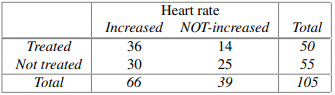

In [23]:
Image(filename = 'Imagenes/T9.6.png')

- ¿Afecta la droga la frecuencia cardíaca? (Respuesta correcta: no) 
- ¿Cuál sería el resultado si la respuesta en una de las personas no tratadas hubiera sido diferente? Realice esta prueba con y sin la corrección de Yates. (Respuesta correcta: sin corrección de Yates: sí, p = 0.042 con corrección de Yates: no, p = 0.067)

$\textbf{a)}$

In [24]:
bs = [[36,14], [30,25]]
bs

[[36, 14], [30, 25]]

In [25]:
chi2, p, dof, expected = stats.chi2_contingency(obs)

In [26]:
if p < alpha:
    print(f'La droga afecta la frecuencia cardiaca. p={p:.4f}')
else:
    print(f'La droga no afecta la frecuencia cardiaca. p={p:.4f}')

La droga no afecta la frecuencia cardiaca. p=0.4795


$\textbf{b)}$

In [36]:
obs2 = [[36,14], [29,26]]

In [37]:
# Con corrección de Yates
chi2, p, dof, expected = stats.chi2_contingency(obs2)

In [38]:
print(f'Si la respuesta en 1 persona no tratada fuera diferente, obtendríamos p={p:.4f} con corrección de Yates')

Si la respuesta en 1 persona no tratada fuera diferente, obtendríamos p=0.0673 con corrección de Yates


In [39]:
if p < alpha:
    print(f'La droga afecta la frecuencia cardiaca. p={p:.4f}')
else:
    print(f'La droga no afecta la frecuencia cardiaca. p={p:.4f}')

La droga no afecta la frecuencia cardiaca. p=0.0673


In [40]:
# Sin corrección de Yates
chi2, p, dof, expected = stats.chi2_contingency(obs2, correction=False)

In [41]:
print(f'Si la respuesta en 1 persona no tratada fuera diferente, obtendríamos p={p:.4f} sin corrección de Yates')

Si la respuesta en 1 persona no tratada fuera diferente, obtendríamos p=0.0423 sin corrección de Yates


In [42]:
if p < alpha:
    print(f'La droga afecta la frecuencia cardiaca. p = {p:.4f}')
else:
    print(f'La droga no afecta la frecuencia cardiaca. p = {p:.4f}')

La droga afecta la frecuencia cardiaca. p = 0.0423


3. Prueba Chi2 de una vía (>1 DOF) 

La ciudad de Linz quiere saber si la gente quiere construir una playa larga a lo largo del Danubio. 

Entrevistan a la población local y deciden recopilar 20 respuestas de cada uno de los 5 grupos de edad: (<15, 15–30, 30–45, 45–60, >60).

El cuestionario dice: "Un desarrollo junto a la playa beneficiará a Linz". y las posibles respuestas son

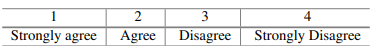

In [45]:
Image(filename = 'Imagenes/T9.7.png')

El concejo municipal quiere averiguar si la edad de las personas influyó en los sentimientos sobre el desarrollo, particularmente de aquellos que se sintieron negativamente (es decir, "en desacuerdo" o "muy en desacuerdo") sobre el desarrollo planificado.

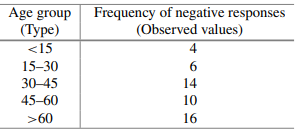

In [46]:
Image(filename = 'Imagenes/T9.8.png')

Las categorías parecen mostrar grandes diferencias de opinión entre los grupos. 
- ¿Son significativas estas diferencias? (Respuesta correcta: sí, p = 0,034.) 
- ¿Cuántos grados de libertad tiene el análisis resultante? (Respuesta correcta: 4.)

In [47]:
# Chi2-oneway-test
obs = [4,6,14,10,16]
obs

[4, 6, 14, 10, 16]

$ \textbf{a)} $

In [48]:
_, p = stats.chisquare(obs)

In [49]:
if p < alpha:
    print(f'La diferencia de opinión entre los distintos grupos de edad es significativa (p={p:6.4f})')
else:
    print(f'TLa diferencia de opinión entre los distintos grupos de edad no es significativa (p={p:6.4f})')

La diferencia de opinión entre los distintos grupos de edad es significativa (p=0.0342)


$ \textbf{b)} $

In [51]:
print(f'DOF = {len(obs)-1:3d}')

DOF =   4


4. Prueba de McNemar 

En una demanda por asesinato, la defensa utiliza un cuestionario para demostrar que el acusado está loco. 

Como resultado del cuestionario, el imputado se declara “no culpable por razón de demencia”. 

En respuesta, el abogado del estado quiere demostrar que el cuestionario no funciona. 

Contrata a un neurólogo experimentado y le presenta 40 pacientes, 20 de los cuales han completado el cuestionario con un resultado "loco" y 20 con un resultado "cuerdo". 

Cuando lo examina el neurólogo, el resultado es mixto: 19 de las personas "sanas" se encuentran sanas, pero 6 de las 20 personas "locas" son etiquetadas como cuerdas por el experto.

- ¿Es este resultado significativamente diferente del cuestionario? (Respuesta correcta: no) 
- ¿Sería significativamente diferente el resultado si el experto hubiera diagnosticado correctamente a todas las personas “sanas”? (Respuesta correcta: sí.)

$\textbf{a)}$

In [2]:
obs = [[19,1], [6, 14]]
obs

[[19, 1], [6, 14]]

In [6]:
resultado1 = mcnemar(obs)
resultado1

<bunch containing results, print to see contents>

In [8]:
estadistico1 = resultado1.statistic
estadistico1

1.0

In [9]:
pvalue1 = resultado1.pvalue
pvalue1

0.125

In [10]:
alpha = 0.05

In [22]:
if pvalue1 < alpha:
    print(f'Los resultados del neurólogo son significativamente diferentes del cuestionario. (p = {pvalue1:.3f}).')
else:
    print(f'Los resultados del neurólogo no son significativamente diferentes del cuestionario (p = {pvalue1:.3f}).')

Los resultados del neurólogo no son significativamente diferentes del cuestionario (p = 0.125).


$\textbf{b)}$

In [15]:
obs2 = [[20,0], [6, 14]]

In [16]:
resultado2 = mcnemar(obs2)
resultado2

<bunch containing results, print to see contents>

In [17]:
estadistico2 = resultado2.statistic
estadistico2

0.0

In [18]:
pvalue2 = resultado2.pvalue
pvalue2

0.03125

In [23]:
if pvalue2 < alpha:
    print(f'Los resultados del neurólogo son significativamente diferentes del cuestionario. (p = {pvalue2:.3f}).')
else:
    print(f'Los resultados del neurólogo no son significativamente diferentes del cuestionario (p = {pvalue2:.3f}).')

Los resultados del neurólogo son significativamente diferentes del cuestionario. (p = 0.031).


In [19]:
pvalue1 < alpha

False

In [20]:
pvalue2 < alpha

True

In [21]:
if (pvalue1 < alpha == pvalue2 < alpha):
    print('Los resultados no cambiarían si el experto hubiera diagnosticado correctamente a todas las personas "cuerdas".')
else:
    print('Los resultados cambiarían si el experto hubiera diagnosticado correctamente a todas las personas "cuerdas".')

Los resultados cambiarían si el experto hubiera diagnosticado correctamente a todas las personas "cuerdas".
